In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# Loading the dataset
df = pd.read_csv("kidney_disease.csv")

In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data Description

1) age = age

2) bp = blood pressure

3) sg = specific gravity

4) al = albumin

5) su = sugar

6) rbc = red blood cells

7) pc = pus cell

8) pcc = pus cell clumps

9) ba = bacteria

10) bgr = blood glucose random

11) bu = blood urea

12) sc = serum ceratinine

13) sod = sodium

14) pot = potassium

15) hemo = hemoglobin

16) pcv = packed cell volume

17) wc = white blood cell count

18) rc = red blood cell count

19) htn = hypertension

20) dm = diabetes mellitus

21) cad = coronary artery disease

22) appet = appetite

23) pe = pedal edema

24) ane = anemia

25) classification

In [8]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [9]:
df.sample(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
122,122,34.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,yes,ckd
207,207,50.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,41,10400,4.6,yes,yes,no,good,no,no,ckd
121,121,54.0,60.0,NaN,3.0,NaN,NaN,NaN,notpresent,notpresent,...,46,NaN,NaN,yes,yes,no,good,yes,no,ckd
10,10,50.0,60.0,1.010,2.0,4.0,NaN,abnormal,present,notpresent,...,28,NaN,NaN,yes,yes,no,good,no,yes,ckd
350,350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,...,43,9600,4.5,no,no,no,good,no,no,notckd


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Data Cleaning

In [11]:
# Dropping ID column 
df = df.drop("id",axis=1)

In [12]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
# Renaming the column names

df.columns = ['age','blood_pressure','specific_gravity','albumin',
             'sugar','red_blood_cells','pus_cell','pus_cell_clumps',
             'bacteria','blood_glucose_random','blood_urea','serum_ceratinine',
             'sodium','potassium','hemoglobin','packed_cell_volume',
             'white_blood_cell_count','red_blood_cell_count','hypertension',
             'diabetes_mellitus','coronary_artery_disease','appetite',
             'pedal_edema','anemia','class']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_ceratinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [15]:
## Columns(sg,al and su) are float type converting them into object
df[['specific_gravity','albumin','sugar']] = df[['specific_gravity','albumin','sugar']].astype('object')

In [16]:
## Columns(pcv,wc and rc) are object type. convert them into numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'],errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'],errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_ceratinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [18]:
## Extracting categorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype=='object']
num_col = [col for col in df.columns if df[col].dtype!='object']

In [19]:
print("Categorical Columns : \n",cat_col)
print("Numerical Columns : \n",num_col)

Categorical Columns : 
 ['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']
Numerical Columns : 
 ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_ceratinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [20]:
# checking unique values in categorical columns
for col in cat_col:
    print(f"{col} : {df[col].unique()}")

specific_gravity : [1.02 1.01 1.005 1.015 nan 1.025]
albumin : [1.0 4.0 2.0 3.0 0.0 nan 5.0]
sugar : [0.0 3.0 4.0 1.0 nan 2.0 5.0]
red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease : ['no' 'yes' '\tno' nan]
appetite : ['good' 'poor' nan]
pedal_edema : ['no' 'yes' nan]
anemia : ['no' 'yes' nan]
class : ['ckd' 'ckd\t' 'notckd']


In [21]:
# replacing incorrect values like '\tno','\tyes',' yes','ckd','ckd\t','notckd' in categorical columns
df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [22]:
for col in cat_col:
    print(f"{col} : {df[col].unique()}")

specific_gravity : [1.02 1.01 1.005 1.015 nan 1.025]
albumin : [1.0 4.0 2.0 3.0 0.0 nan 5.0]
sugar : [0.0 3.0 4.0 1.0 nan 2.0 5.0]
red_blood_cells : [nan 'normal' 'abnormal']
pus_cell : ['normal' 'abnormal' nan]
pus_cell_clumps : ['notpresent' 'present' nan]
bacteria : ['notpresent' 'present' nan]
hypertension : ['yes' 'no' nan]
diabetes_mellitus : ['yes' 'no' nan]
coronary_artery_disease : ['no' 'yes' nan]
appetite : ['good' 'poor' nan]
pedal_edema : ['no' 'yes' nan]
anemia : ['no' 'yes' nan]
class : ['ckd' 'notckd']


In [23]:
# Converting target columns classification into 0 (chronic kidney/ckd) and 1 (not a chronic kidney)
df['class'] = df['class'].map({'ckd':0,'notckd':1})

In [24]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [25]:
# Converting target column into numeric to check correlaton
df['class'] = pd.to_numeric(df['class'],errors='coerce')

## EDA

<Figure size 2000x1200 with 0 Axes>

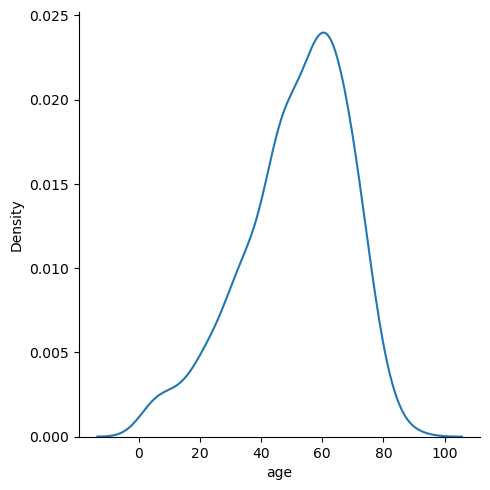

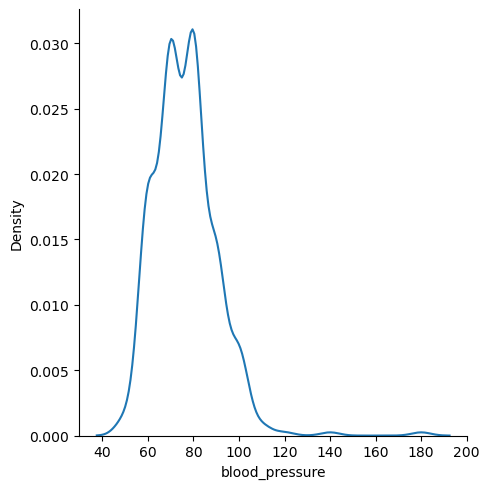

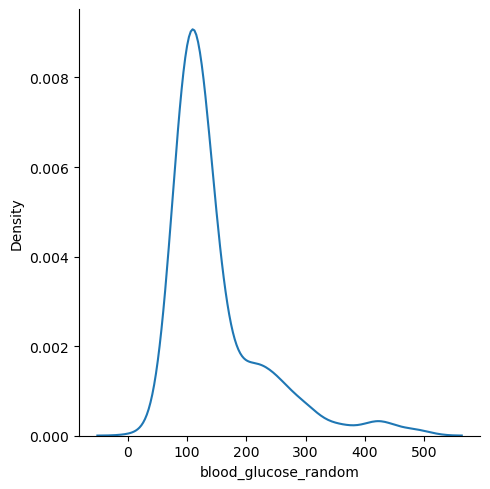

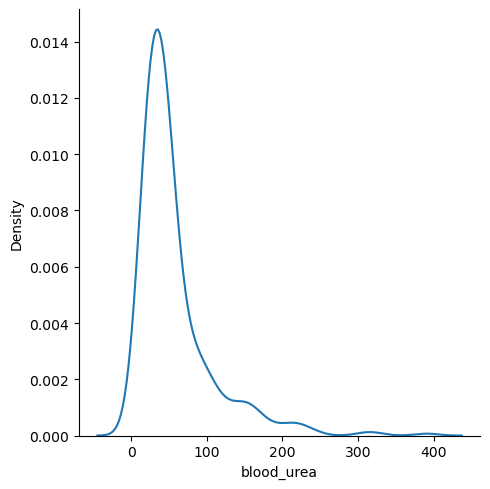

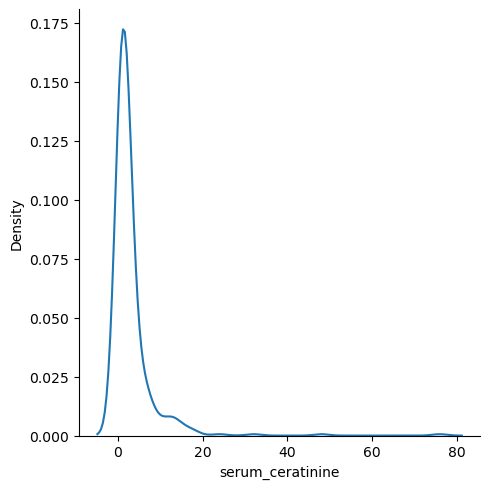

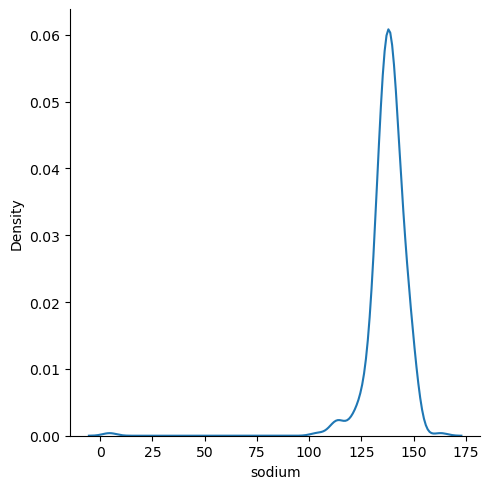

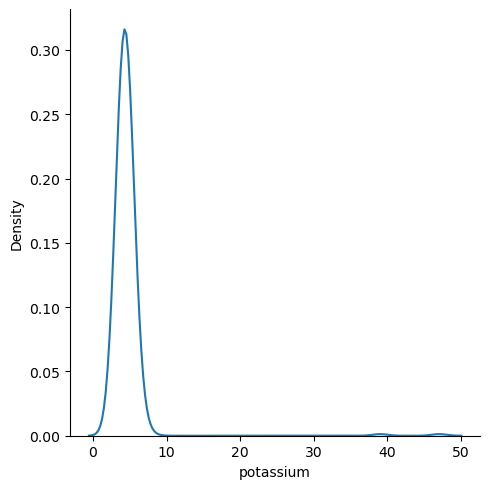

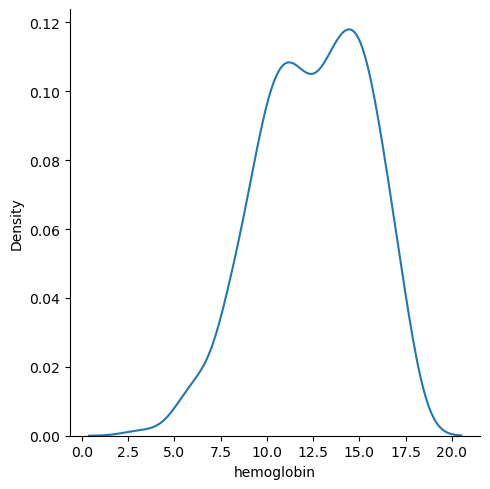

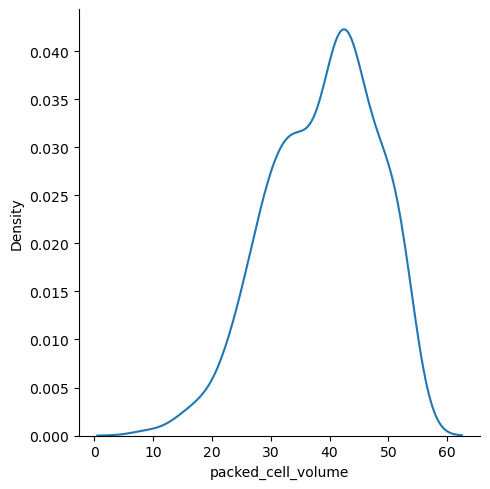

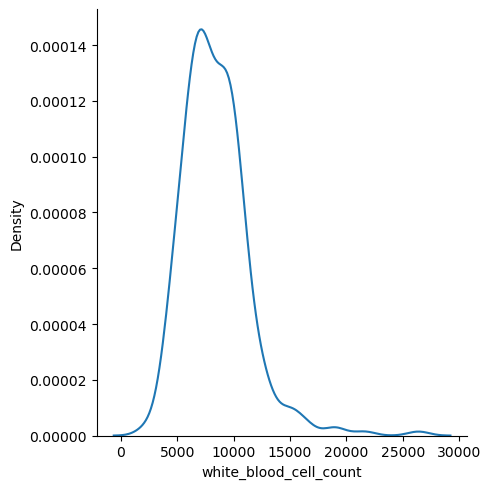

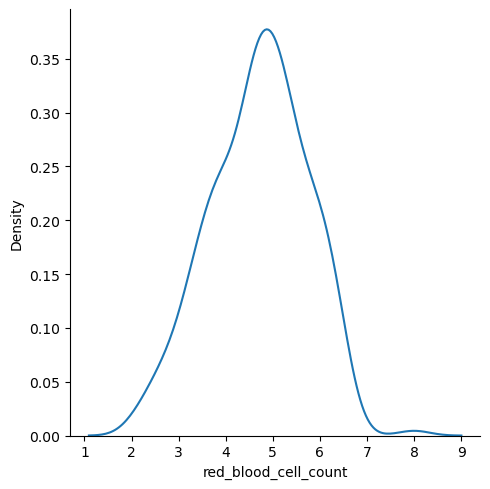

In [26]:
# checking numerical features distribution
plt.figure(figsize=(20,12))

#looping over numerical columns and checking its distribution

for col in num_col:
    sns.displot(df[col],kind='kde')

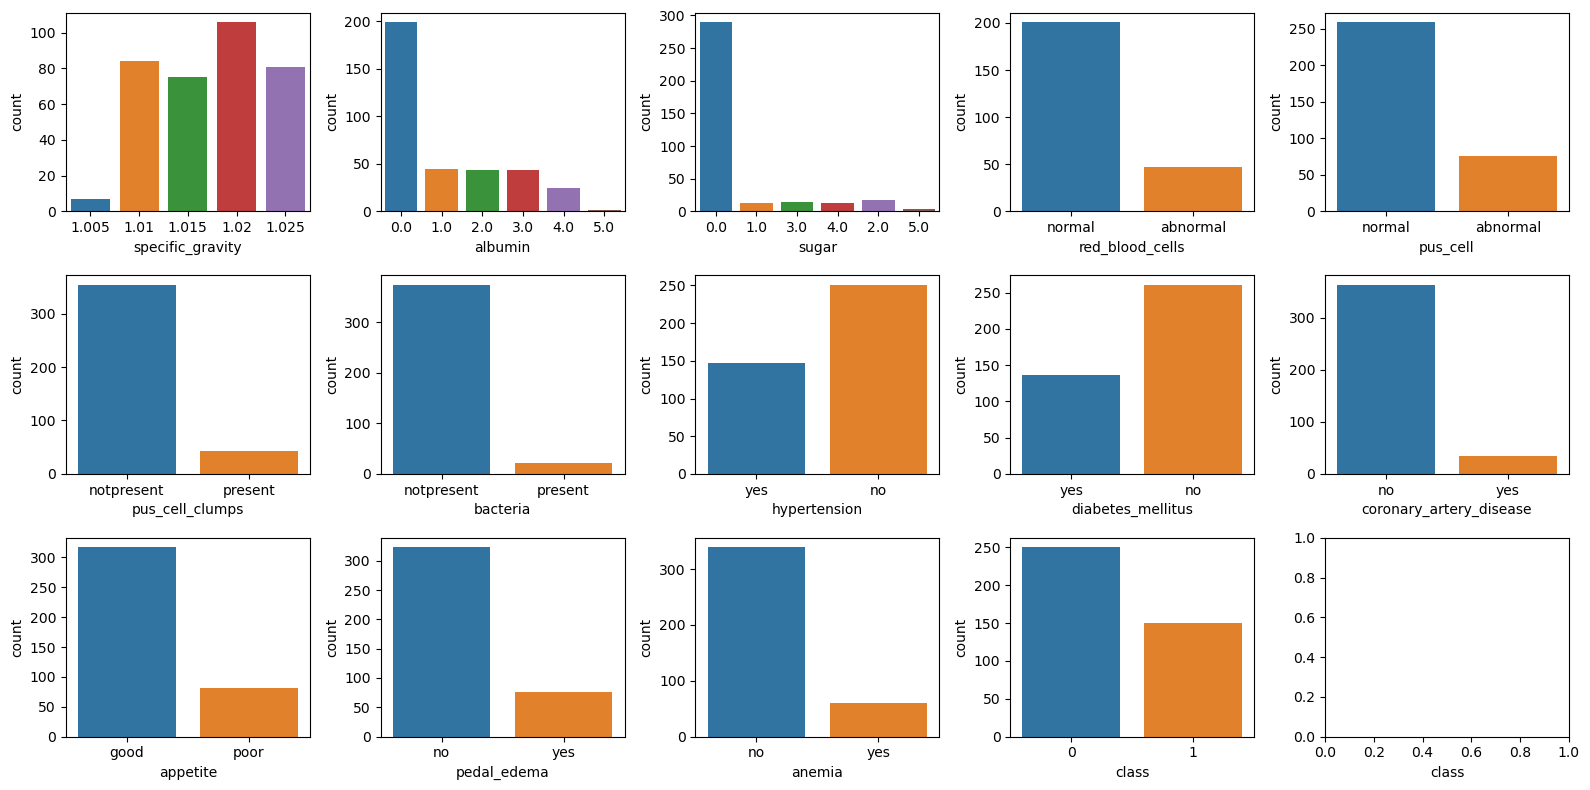

In [27]:
# checking categorical features distribution
# creating figure and axes

fig,axes = plt.subplots(3,5,figsize=(16,8))
axes = axes.ravel()   # flattening the array makes indexing easier

# loop over categorical columns and plot countplot

for col,ax in zip(cat_col,axes):
    sns.countplot(data=df,x=col,ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

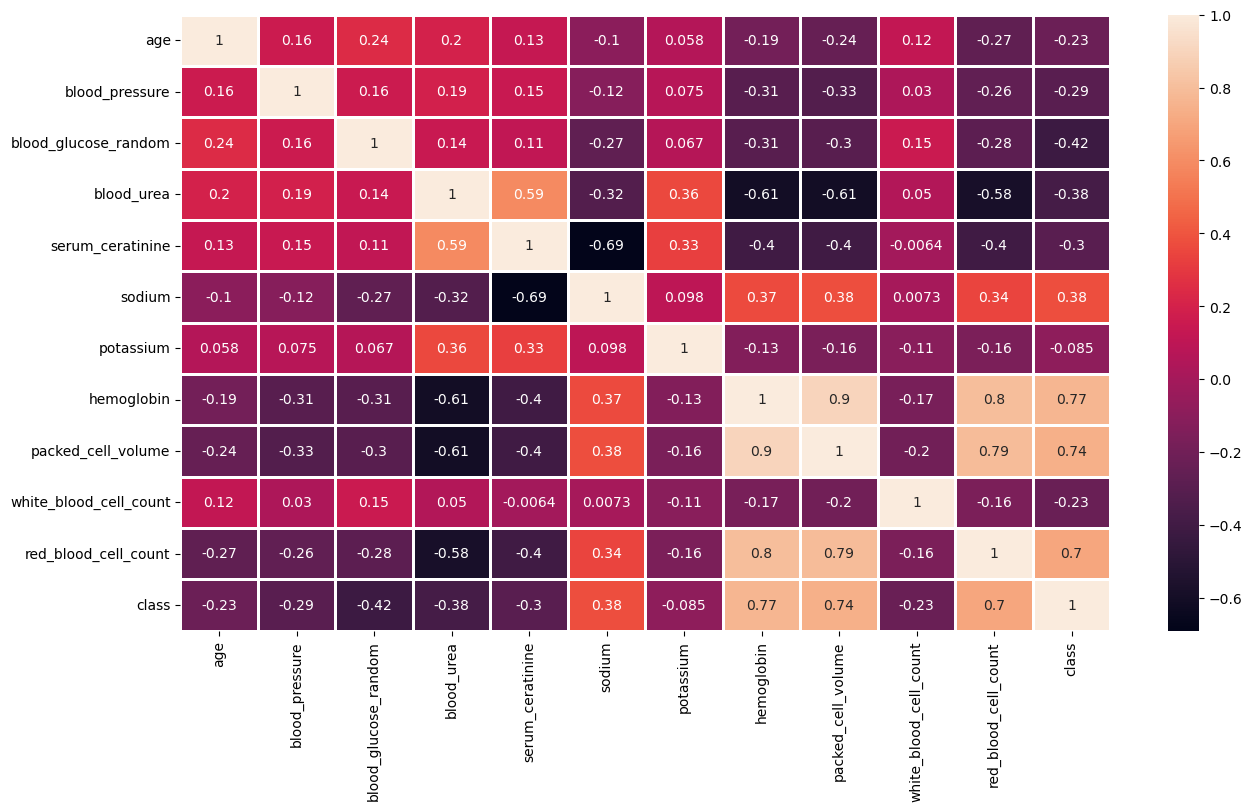

In [28]:
# correlation 

plt.figure(figsize=(15,8))

sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='white')
plt.show()

In [29]:
# checking null value 
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_ceratinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [30]:
# checking count of null values in numerical columns
df[num_col].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
blood_glucose_random       44
blood_urea                 19
serum_ceratinine           17
blood_pressure             12
age                         9
dtype: int64

In [31]:
# checking count of null values in categorical columns
df[cat_col].isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [32]:
# Filling numerical columns with mean
df[num_col] = df[num_col].fillna(df[num_col].mean())


# Filling categorical columns with mode
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [33]:
df.isnull().sum().sort_values(ascending=False)

age                        0
potassium                  0
anemia                     0
pedal_edema                0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
hemoglobin                 0
sodium                     0
blood_pressure             0
serum_ceratinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

In [34]:
# checking unique values in each categorical columns
df[cat_col].nunique()

specific_gravity           5
albumin                    6
sugar                      6
red_blood_cells            2
pus_cell                   2
pus_cell_clumps            2
bacteria                   2
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   2
pedal_edema                2
anemia                     2
class                      2
dtype: int64

In [35]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,1


In [36]:
## Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for col in cat_col[3:]:
    df[col] = le.fit_transform(df[col])

In [38]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [39]:
# Spliting data into features and target variables (x and y)
X = df.drop('class',axis=1)
y = df['class']

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
'''import KNeighborsClassifier,accuracy_score,
confusion_matrix,classification_report'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

knn = KNeighborsClassifier()

In [42]:
knn.fit(X_train,y_train)
y_test_preds_knn = knn.predict(X_test)
y_train_preds_knn = knn.predict(X_train)

In [43]:
def acc_report(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    cn_matrix = confusion_matrix(actual,predicted)
    cla_report = classification_report(actual,predicted)
    print('accuracy :-')
    print(acc_score)
    print('confusion matrix :-')
    print(cn_matrix)
    print('classification report :-')
    print(cla_report)



acc_report(y_train,y_train_preds_knn)
print("----------------------------------------------------------------------------------------------")
acc_report(y_test,y_test_preds_knn)

accuracy :-
0.853125
confusion matrix :-
[[157  41]
 [  6 116]]
classification report :-
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       198
           1       0.74      0.95      0.83       122

    accuracy                           0.85       320
   macro avg       0.85      0.87      0.85       320
weighted avg       0.88      0.85      0.86       320

----------------------------------------------------------------------------------------------
accuracy :-
0.725
confusion matrix :-
[[33 19]
 [ 3 25]]
classification report :-
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        52
           1       0.57      0.89      0.69        28

    accuracy                           0.73        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80



In [45]:
## DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_test_preds_dtc = dtc.predict(X_test)
y_train_preds_dtc = dtc.predict(X_train)

In [47]:
def acc_report(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    cn_matrix = confusion_matrix(actual,predicted)
    cla_report = classification_report(actual,predicted)
    print('accuracy :-')
    print(acc_score)
    print('confusion matrix :-')
    print(cn_matrix)
    print('classification report :-')
    print(cla_report)



acc_report(y_train,y_train_preds_dtc)
print("----------------------------------------------------------------------------------------------")
acc_report(y_test,y_test_preds_dtc)

accuracy :-
1.0
confusion matrix :-
[[198   0]
 [  0 122]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------------------------------------------------------------------
accuracy :-
0.9875
confusion matrix :-
[[51  1]
 [ 0 28]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [48]:
## Hpyer parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV

In [50]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}

# applying gridsearchCV with cv = 5, n_jobs = -1, verbose=1
grid_search_dtc = GridSearchCV(dtc,grid_param,cv=5,n_jobs = -1,verbose=1)

grid_search_dtc.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
## Best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.984375


In [54]:
dtc = grid_search_dtc.best_estimator_

def acc_report(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    cn_matrix = confusion_matrix(actual,predicted)
    cla_report = classification_report(actual,predicted)
    print('accuracy :-')
    print(acc_score)
    print('confusion matrix :-')
    print(cn_matrix)
    print('classification report :-')
    print(cla_report)



acc_report(y_train,y_train_preds_dtc)
print("----------------------------------------------------------------------------------------------")
acc_report(y_test,y_test_preds_dtc)

accuracy :-
1.0
confusion matrix :-
[[198   0]
 [  0 122]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------------------------------------------------------------------
accuracy :-
0.9875
confusion matrix :-
[[51  1]
 [ 0 28]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [56]:
## RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion='entropy',
                               max_depth=11,
                               max_features='auto',
                               min_samples_leaf=2,
                               min_samples_split=3,
                               n_estimators=130)

rd_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [57]:
y_test_preds_rd_clf = rd_clf.predict(X_test)
y_train_preds_rd_clf = rd_clf.predict(X_train)

In [58]:
def acc_report(actual,predicted):
    acc_score = accuracy_score(actual,predicted)
    cn_matrix = confusion_matrix(actual,predicted)
    cla_report = classification_report(actual,predicted)
    print('accuracy :-')
    print(acc_score)
    print('confusion matrix :-')
    print(cn_matrix)
    print('classification report :-')
    print(cla_report)



acc_report(y_train,y_train_preds_rd_clf)
print("----------------------------------------------------------------------------------------------")
acc_report(y_test,y_test_preds_rd_clf)

accuracy :-
1.0
confusion matrix :-
[[198   0]
 [  0 122]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

----------------------------------------------------------------------------------------------
accuracy :-
1.0
confusion matrix :-
[[52  0]
 [ 0 28]]
classification report :-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

